## Import all required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Configs

In [2]:
df_path = './Data/haberman.csv'

# Dataset Descriptions

In [3]:
df = pd.read_csv(df_path, index_col=False, names=['Age', 'Op_Year', 'Num_Nodes', 'Surv_Status'])
df.head()

,Age,Op_Year,Num_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


%%HTML
<p>The dataset contains cases from a study that was conducted between 1958 and 1970 at the University 
   of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. </p>
<dl>
<dt> Age </dt>  
<dd> Age of patient at time of operation (numerical) </dd> 
<dt> Op_Year </dt>
<dd> Patient's year of operation (year - 1900, numerical) </dd>
<dt> Num_Nodes</dt>
<dd> Number of positive axillary nodes detected (numerical) </dd>
<dt> Surv_Status</dt>
<dt> Survival status (class attribute) </dt> 
<dd> -- 1 = the patient survived 5 years or longer </dd> </br> 
<dd> -- 2 = the patient died within 5 year </dd>
</dl>

## Objective

Identify the useful features which helps us in classifying the patient survied or not

# High level statistics of the dataset

In [4]:
print('Number of data points :', df.shape[0])
print('Number of columns/ features :', df.shape[1])
print('Number of clasess :', len(df['Surv_Status'].unique()))
value_counts = df['Surv_Status'].value_counts()
print('number of data points per class 1 & 2')
print('Class 1 size: ',value_counts[1], '\tClass 2 size: ', value_counts[2])

Number of data points : 306
Number of columns/ features : 4
Number of clasess : 2
number of data points per class 1 & 2
Class 1 size:  225 	Class 2 size:  81


%%HTML
<h2> Observation </h2>
<ul>
<li> Dataset is highly imbalanced survived : not survived =  25:9
</ul>

# Univaraite analysis

## a) PDF plot

/home/nisheels/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


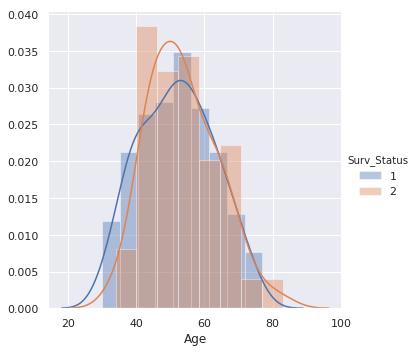

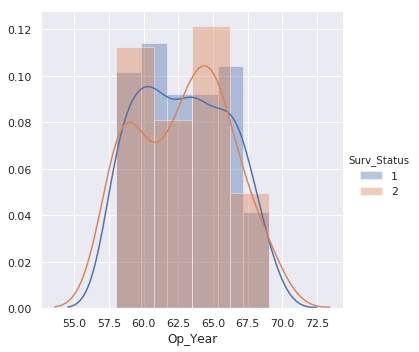

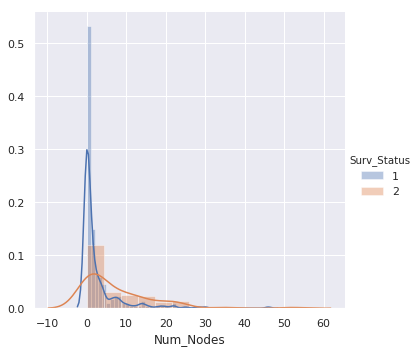

In [5]:
sns.FacetGrid(df, hue='Surv_Status', height=5).map(sns.distplot, 'Age').add_legend();
plt.show();

sns.FacetGrid(df, hue='Surv_Status', height=5).map(sns.distplot, 'Op_Year').add_legend();
plt.show();

sns.FacetGrid(df, hue='Surv_Status', height=5).map(sns.distplot, 'Num_Nodes').add_legend();
plt.show();

%%HTML
<h2> Observations</h2>
<ul>
<li> There is <b>considerable overlap</b> between the distributions of survived and not survived for all features </li>
<li> For not survived class the Num_Nodes feature has slighly higher value when compared with survived one
     as there is a slight shift towardds the right
     for its peak position</li>
</ul>

## b) PDF & CDF plot

In [6]:
df_survived = df[df['Surv_Status'] == 1 ]
df_not_survived = df[df['Surv_Status'] == 2]
features_list = ['Age', 'Op_Year', 'Num_Nodes']

In [19]:
def plot_distribution(df_temp, feat_name, class_name):
    # get histogram from the data frame
    counts, bin_edges = np.histogram(df_temp[feat_name], bins=10, density=True)
    
    # plot PDF and CDF of the distribution in single image
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, label='PDF')
    plt.plot(bin_edges[1:], cdf, label='CDF')
    
    # set title, labels to axes
    plt.xlabel(feat_name)
    plt.ylabel('Density / Probability')
    plt.title(feat_name + ' PDF & CDF of '+ class_name)
    
    # add legend
    plt.legend()
    
    # display the image
    plt.show()

### Plot for survied data

==============================	 Age	PDF & CDF	==============================


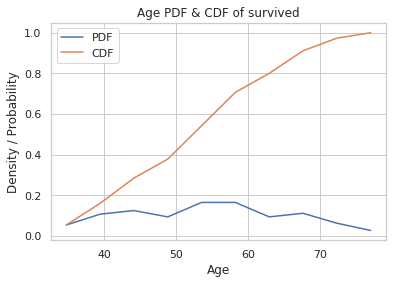

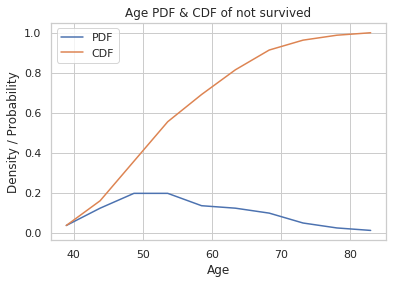

==============================	 Op_Year	PDF & CDF	==============================


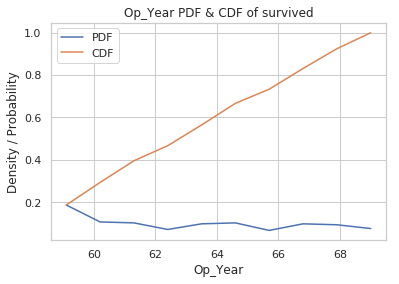

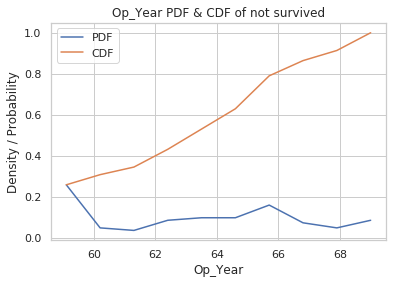

==============================	 Num_Nodes	PDF & CDF	==============================


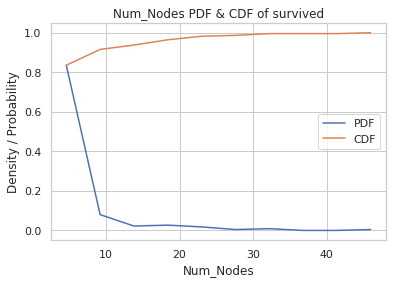

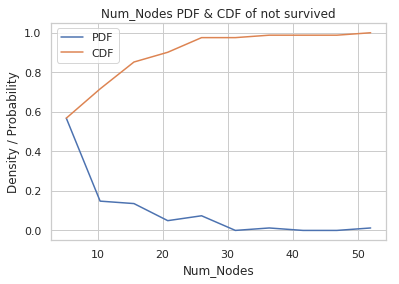

In [31]:
for feat_name in features_list:
    print('=' * 30 + "\t " + feat_name + '\tPDF & CDF\t' + '=' * 30)
    plot_distribution(df_survived, feat_name, 'survived')
    plot_distribution(df_not_survived, feat_name, 'not survived')
    print('=' * 100)

%%HTML
<ul>
<h2> Observation </h2>
<li> There are no significant differences in PDF & CDF between the clasess for any feature </li>
</ul>

## C) Box plots

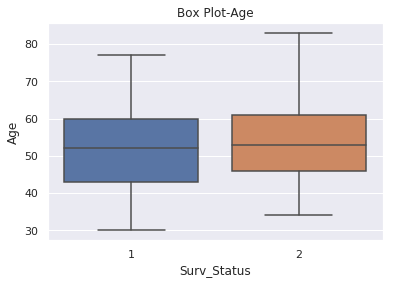

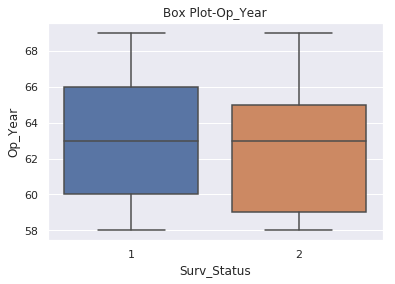

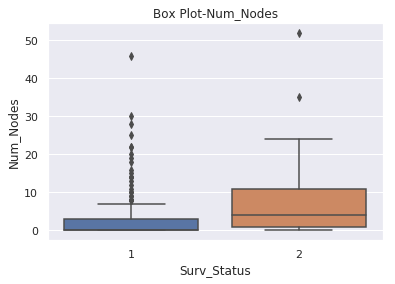

In [10]:
for feat_name in features_list:
    sns.boxplot(x='Surv_Status', y=feat_name, data=df)
    plt.title('Box Plot-' + feat_name)
    plt.show()

%%HTML
<h2> Observations</h2>
<ul>
<li> There is considerable difference between medians of the feature Num_nodes</li>
<li> IQR of not survived is much broader compared to survived </li>
<li> The Num nodes feature may be really useful in improving prediction </li>
<li> The number of outliers for survived seems bit high </li>
</ul>

### D) Violin Plots

/home/nisheels/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


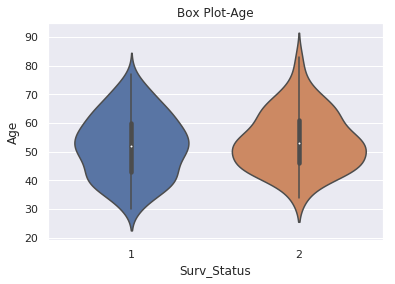

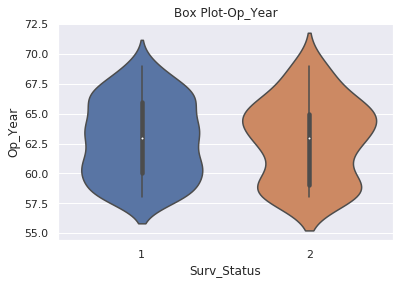

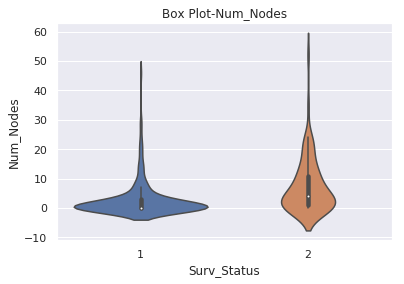

In [11]:
for feat_name in features_list:
    sns.violinplot(x='Surv_Status', y=feat_name, data=df)
    plt.title('Box Plot-' + feat_name)
    plt.show()

%%HTML
<h2> Observations </h2>
<ul>
<li> The num_nodes feature is highly right skewed </li>
<li> The density of Num nodes feature is much concentrated around zero for survived class </li>
</ul>

# Multivariate Analysis

## A) Pairwise Scatter Plots

/home/nisheels/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


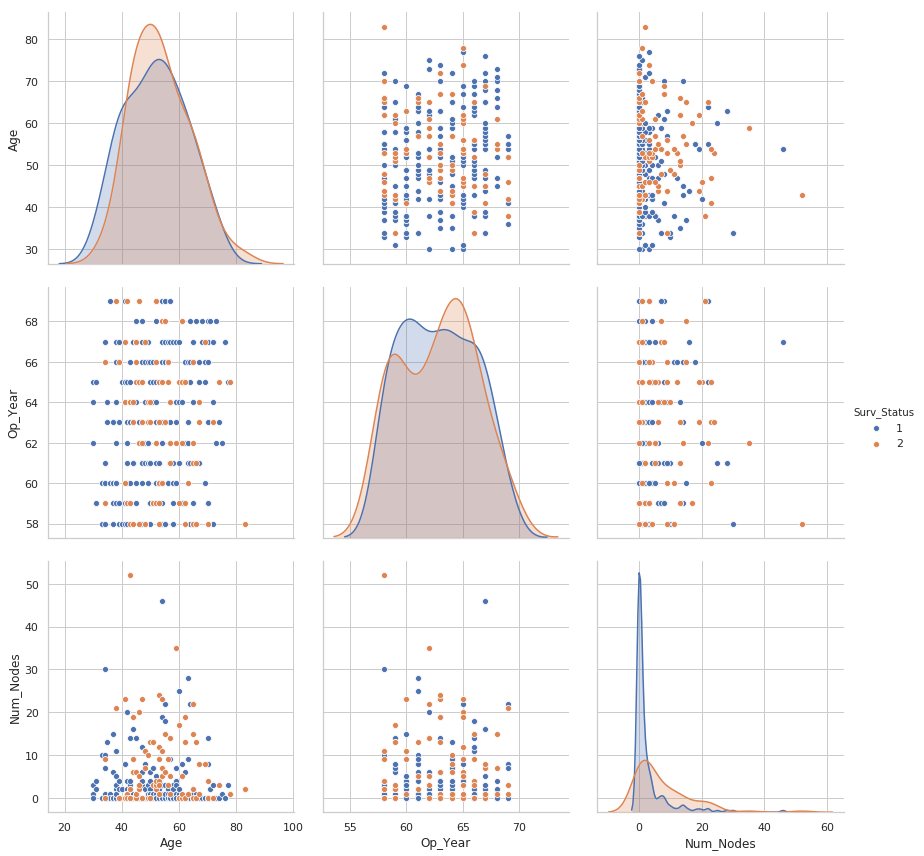

In [12]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='Surv_Status', vars=features_list, height=4);
plt.show()

%%HTML
<h2> Observations </h2>
<ul>
<li> Scatter plots shows there is no correlation between any two features </li>
</ul>

# Contour Plots

In [13]:
# set a list of feature combinations
feat_combinations = [('Num_Nodes', 'Age',), ('Op_Year', 'Age',), ('Num_Nodes', 'Op_Year',)]

==============================	Num_Nodes	Age	Contour Plot	==============================


/home/nisheels/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


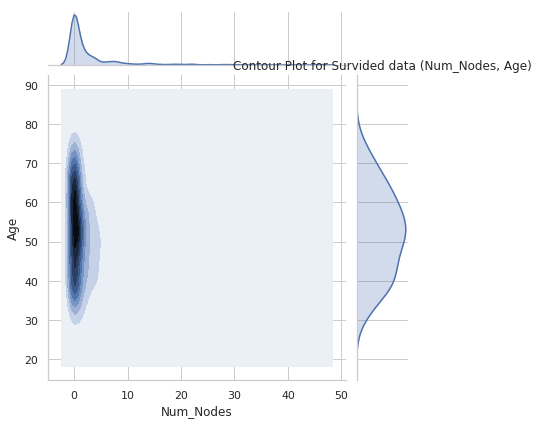

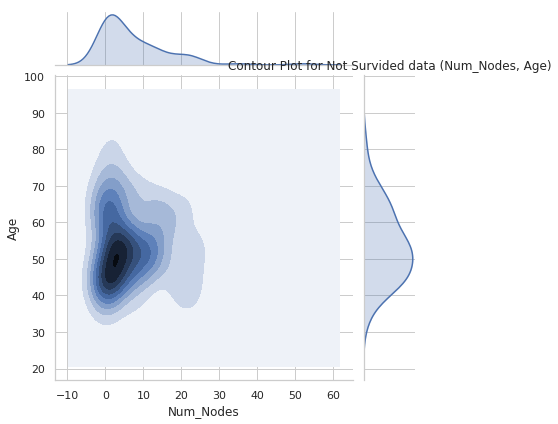

==============================	Op_Year	Age	Contour Plot	==============================


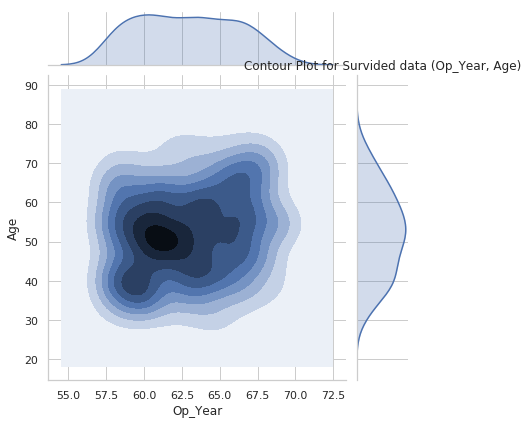

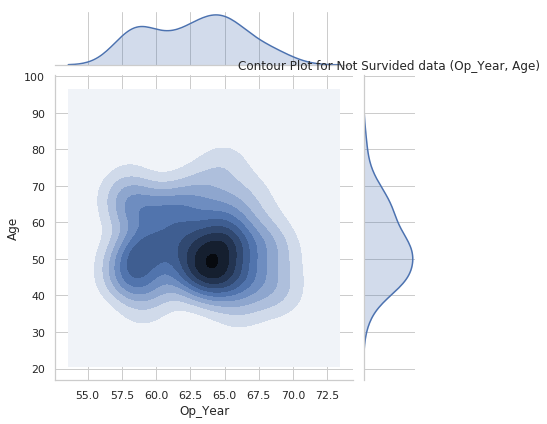

==============================	Num_Nodes	Op_Year	Contour Plot	==============================


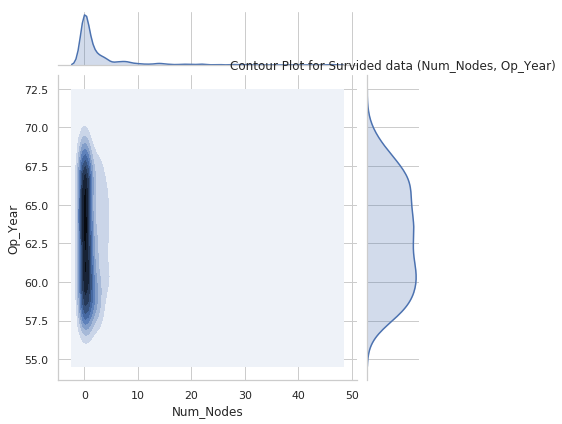

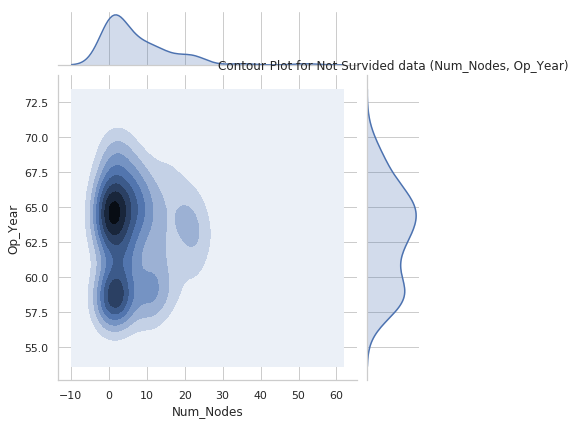

In [33]:
#2D Density plot, contors-plot
for feature_combs in feat_combinations:
    print('=' * 30 + '\t' + feature_combs[0] + '\t' + feature_combs[1] + '\t Contour Plot\t' + '=' * 30)
    sns.jointplot(x=feature_combs[0], y=feature_combs[1], data=df_survived, kind="kde");
    plt.title('Contour Plot for Survived data (%s, %s)'%feature_combs)
    plt.show();
    sns.jointplot(x=feature_combs[0], y=feature_combs[1], data=df_not_survived, kind="kde");
    plt.title('Contour Plot for Not Survived data (%s, %s)'%feature_combs)
    plt.show();
    print('='*100)

# Conclusion

%%HTML
<ul>
<li> From the EDA results, the Num_nodes feature is the most important for classification </li>
</ul>